<a href="https://colab.research.google.com/github/tejaswi194117/Dev-folio/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this below one is for specific chats


Extracted: WhatsApp Chat with Meri Jaan.txt
Total messages: 60

Top senders:
Tejjjj: 39 messages
Meri Jaan: 21 messages

Sentiment Summary:
{'positive': 4, 'neutral': 51, 'negative': 5}


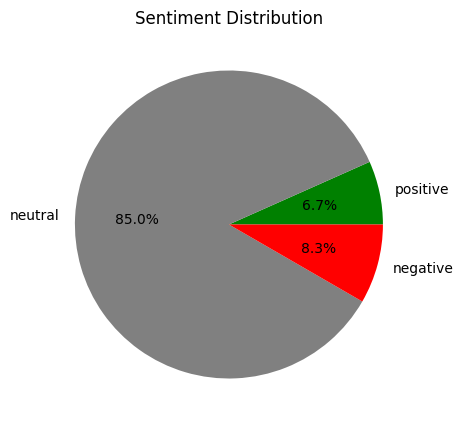

In [8]:
import zipfile
import os
import re
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: Unzip the chat file
zip_path = '/content/WhatsApp Chat with Meri Jaan.zip'
extract_path = '/content/whatsapp_chat/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Get extracted .txt file
for filename in os.listdir(extract_path):
    print("Extracted:", filename)

# Update this path if filename is different
file_path = '/content/whatsapp_chat/WhatsApp Chat with Meri Jaan.txt'

# Step 3: Parse WhatsApp messages
def parse_chat(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        chat_lines = file.readlines()

    messages = []
    pattern = r'^(\d{1,2}/\d{1,2}/\d{2,4}),\s(\d{1,2}:\d{2}\s[ap]m)\s-\s([^:]+):\s(.+)$'

    for line in chat_lines:
        match = re.match(pattern, line)
        if match:
            date, time, sender, message = match.groups()
            messages.append({
                'date': date,
                'time': time,
                'sender': sender,
                'message': message
            })

    return messages

# Step 4: Analyze the chat
def analyze_whatsapp_chat(file_path):
    messages = parse_chat(file_path)

    if not messages:
        print("No messages found.")
        return

    print(f"Total messages: {len(messages)}")

    # Count messages per sender
    sender_counts = Counter(msg['sender'] for msg in messages)
    print("\nTop senders:")
    for sender, count in sender_counts.most_common(5):
        print(f"{sender}: {count} messages")

    # Basic sentiment analysis
    sentiments = {'positive': 0, 'neutral': 0, 'negative': 0}

    for msg in messages:
        blob = TextBlob(msg['message'])
        polarity = blob.sentiment.polarity
        if polarity > 0.1:
            sentiments['positive'] += 1
        elif polarity < -0.1:
            sentiments['negative'] += 1
        else:
            sentiments['neutral'] += 1

    print("\nSentiment Summary:")
    print(sentiments)

    # Plot sentiment pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(sentiments.values(), labels=sentiments.keys(), autopct='%1.1f%%', colors=['green', 'grey', 'red'])
    plt.title('Sentiment Distribution')
    plt.show()

# Step 5: Run analysis
analyze_whatsapp_chat(file_path)
